<a href="https://colab.research.google.com/github/nceder/qpb4e/blob/main/code/Chapter%2024/Chapter_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24 Exploring data

# 24.2.2 Installing pandas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np


# 24.2.3 Data frames

In [2]:
grid = [[1,2,3], [4,5,6], [7,8,9]]
print(grid)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [3]:
import pandas as pd
df = pd.DataFrame(grid)
print(df)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


In [4]:
df = pd.DataFrame(grid, columns=["one", "two", "three"] )
print(df)


   one  two  three
0    1    2      3
1    4    5      6
2    7    8      9


In [5]:
print(df["two"])

0    2
1    5
2    8
Name: two, dtype: int64


In [6]:
print([x[1] for x in grid])

[2, 5, 8]


In [7]:
for x in df["two"]:
    print(x)

2
5
8


In [8]:
edges = df[["one", "three"]]
print(edges)


   one  three
0    1      3
1    4      6
2    7      9


In [9]:
print(edges.add(2))

   one  three
0    3      5
1    6      8
2    9     11


In [10]:
df['two'].value_counts()

,count
two,
2,1
5,1
8,1


# 24.3.1 Loading and saving data with pandas

In [11]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2024/mars_data_01.json &> null  && echo mars_data_01.json Downloaded
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2024/temp_data_01.csv &> null  && echo temp_data_01.csv Downloaded

mars_data_01.json Downloaded
temp_data_01.csv Downloaded


In [12]:
mars = pd.read_json("mars_data_01.json")
print(mars)

                                   report
terrestrial_date               2017-01-11
sol                                  1576
ls                                  296.0
min_temp                            -72.0
min_temp_fahrenheit                 -97.6
max_temp                             -1.0
max_temp_fahrenheit                  30.2
pressure                            869.0
pressure_string                    Higher
abs_humidity                         None
wind_speed                           None
wind_direction                         --
atmo_opacity                        Sunny
season                           Month 10
sunrise              2017-01-11T12:31:00Z
sunset               2017-01-12T00:46:00Z


In [13]:
temp = pd.read_csv("temp_data_01.csv", header=0, names=range(18), usecols=range(4,18))
print(temp)

           4      5    6     7     8      9    10    11    12       13   14  \
0  1979/01/01  17.48  994   6.0  30.5   2.89  994 -13.6  15.8  Missing    0   
1  1979/01/02   4.64  994  -6.4  15.8  -9.03  994 -23.6   6.6  Missing    0   
2  1979/01/03  11.05  994  -0.7  24.7  -2.17  994 -18.3  12.9  Missing    0   
3  1979/01/04   9.51  994   0.2  27.6  -0.43  994 -16.3  16.3  Missing    0   
4  1979/05/15  68.42  994  61.0  75.1  51.30  994  43.3  57.0  Missing    0   
5  1979/05/16  70.29  994  63.4  73.5  48.09  994  41.1  53.0  Missing    0   
6  1979/05/17  75.34  994  64.0  80.5  50.84  994  44.3  55.7    82.60    2   
7  1979/05/18  79.13  994  75.5  82.1  55.68  994  50.0  61.1    81.42  349   
8  1979/05/19  74.94  994  66.9  83.1  58.59  994  50.9  63.2    82.87   78   

        15       16      17  
0  Missing  Missing   0.00%  
1  Missing  Missing   0.00%  
2  Missing  Missing   0.00%  
3  Missing  Missing   0.00%  
4  Missing  Missing   0.00%  
5  Missing  Missing   0.00%  

In [14]:
temp = pd.read_csv("temp_data_01.csv", na_values=['Missing'])
print(temp)

   Notes     State  State Code Month Day, Year Month Day, Year Code  \
0    NaN  Illinois          17    Jan 01, 1979           1979/01/01   
1    NaN  Illinois          17    Jan 02, 1979           1979/01/02   
2    NaN  Illinois          17    Jan 03, 1979           1979/01/03   
3    NaN  Illinois          17    Jan 04, 1979           1979/01/04   
4    NaN  Illinois          17    May 15, 1979           1979/05/15   
5    NaN  Illinois          17    May 16, 1979           1979/05/16   
6    NaN  Illinois          17    May 17, 1979           1979/05/17   
7    NaN  Illinois          17    May 18, 1979           1979/05/18   
8    NaN  Illinois          17    May 19, 1979           1979/05/19   

   Avg Daily Max Air Temperature (F)  Record Count for Daily Max Air Temp (F)  \
0                              17.48                                      994   
1                               4.64                                      994   
2                              11.05          

### Saving data

In [19]:
df.to_csv("df_out.csv", index=False)    #A
!cat df_out.csv

one,two,three
1,2,3
4,5,6
7,8,9


In [20]:
df.to_json()     #A

'{"one":{"0":1,"1":4,"2":7},"two":{"0":2,"1":5,"2":8},"three":{"0":3,"1":6,"2":9}}'

## 24.3.2 Data cleaning with a data frame

In [21]:
temp = pd.read_csv("temp_data_01.csv", na_values=['Missing'], header=0, names=range(18), usecols=range(4,18))    #A
print(temp)

           4      5    6     7     8      9    10    11    12     13   14  \
0  1979/01/01  17.48  994   6.0  30.5   2.89  994 -13.6  15.8    NaN    0   
1  1979/01/02   4.64  994  -6.4  15.8  -9.03  994 -23.6   6.6    NaN    0   
2  1979/01/03  11.05  994  -0.7  24.7  -2.17  994 -18.3  12.9    NaN    0   
3  1979/01/04   9.51  994   0.2  27.6  -0.43  994 -16.3  16.3    NaN    0   
4  1979/05/15  68.42  994  61.0  75.1  51.30  994  43.3  57.0    NaN    0   
5  1979/05/16  70.29  994  63.4  73.5  48.09  994  41.1  53.0    NaN    0   
6  1979/05/17  75.34  994  64.0  80.5  50.84  994  44.3  55.7  82.60    2   
7  1979/05/18  79.13  994  75.5  82.1  55.68  994  50.0  61.1  81.42  349   
8  1979/05/19  74.94  994  66.9  83.1  58.59  994  50.9  63.2  82.87   78   

     15    16      17  
0   NaN   NaN   0.00%  
1   NaN   NaN   0.00%  
2   NaN   NaN   0.00%  
3   NaN   NaN   0.00%  
4   NaN   NaN   0.00%  
5   NaN   NaN   0.00%  
6  82.4  82.8   0.20%  
7  80.2  83.4  35.11%  
8  81.6  85.2

In [22]:
temp[17][0]

'0.00%'

In [23]:
temp[17]=temp[17].str.strip("%")
temp[17][0]

'0.00'

In [24]:
temp[17] = pd.to_numeric(temp[17])
temp[17][0]

0.0

In [25]:
temp[17] = temp[17].div(100)
temp[17]

,17
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000
5,0.0000
6,0.0020
7,0.3511
8,0.0785


### Try this: Cleaning Data with and without pandas
Experiment with the operations. When the final column has been converted to a fraction, can you think of a way to convert it back to a string with the trailing percentage sign?

By contrast, load the same data into a plain Python list by using the `csv` module, and apply the same changes by using plain Python.


# 24.4. 1 Merging data frames

In [26]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2024/sales_calls.csv &> null  && echo sales_calls.csv Downloaded
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2024/sales_revenue.csv &> null  && echo sales_revenue.csv Downloaded

sales_calls.csv Downloaded
sales_revenue.csv Downloaded


In [27]:
calls = pd.read_csv("sales_calls.csv")
print(calls)

   Team member  Territory  Month  Calls
0        Jorge          3      1    107
1        Jorge          3      2     88
2        Jorge          3      3     84
3        Jorge          3      4    113
4          Ana          1      1     91
5          Ana          1      2    129
6          Ana          1      3     96
7          Ana          1      4    128
8          Ali          2      1    120
9          Ali          2      2     85
10         Ali          2      3     87
11         Ali          2      4     87


In [28]:
revenue = pd.read_csv("sales_revenue.csv")
print(revenue)

    Territory  Month  Amount
0           1      1   54228
1           1      2   61640
2           1      3   43491
3           1      4   52173
4           2      1   36061
5           2      2   44957
6           2      3   35058
7           2      4   33855
8           3      1   50876
9           3      2   57682
10          3      3   53689
11          3      4   49173


In [29]:
calls_revenue = pd.merge(calls, revenue, on=['Territory', 'Month'])
print(calls_revenue)

   Team member  Territory  Month  Calls  Amount
0        Jorge          3      1    107   50876
1        Jorge          3      2     88   57682
2        Jorge          3      3     84   53689
3        Jorge          3      4    113   49173
4          Ana          1      1     91   54228
5          Ana          1      2    129   61640
6          Ana          1      3     96   43491
7          Ana          1      4    128   52173
8          Ali          2      1    120   36061
9          Ali          2      2     85   44957
10         Ali          2      3     87   35058
11         Ali          2      4     87   33855


### Quick Check: Merging data sets
How would you go about merging two data sets like the ones in the Python example?

#### Discussion

f you're sure that you have exactly the same number of items in each set and that the items are in the right order, you could use the `zip()` function. Otherwise, you could create a dictionary, with the keys being something common between the two data sets, and then append the date by key from both sets.

## 24.4.2 Selecting data

In [30]:
print(calls_revenue[calls_revenue.Territory==3])

  Team member  Territory  Month  Calls  Amount
0       Jorge          3      1    107   50876
1       Jorge          3      2     88   57682
2       Jorge          3      3     84   53689
3       Jorge          3      4    113   49173


In [31]:
print(calls_revenue[calls_revenue.Amount/calls_revenue.Calls>500])

  Team member  Territory  Month  Calls  Amount
1       Jorge          3      2     88   57682
2       Jorge          3      3     84   53689
4         Ana          1      1     91   54228
9         Ali          2      2     85   44957


In [32]:
calls_revenue['Call_Amount'] = calls_revenue.Amount/calls_revenue.Calls
print(calls_revenue)

   Team member  Territory  Month  Calls  Amount  Call_Amount
0        Jorge          3      1    107   50876   475.476636
1        Jorge          3      2     88   57682   655.477273
2        Jorge          3      3     84   53689   639.154762
3        Jorge          3      4    113   49173   435.159292
4          Ana          1      1     91   54228   595.912088
5          Ana          1      2    129   61640   477.829457
6          Ana          1      3     96   43491   453.031250
7          Ana          1      4    128   52173   407.601562
8          Ali          2      1    120   36061   300.508333
9          Ali          2      2     85   44957   528.905882
10         Ali          2      3     87   35058   402.965517
11         Ali          2      4     87   33855   389.137931


### Quick Check: Selecting in Python
What Python code structure would you use to select only rows meeting certain conditions?

#### Solution

You’d probably use a list comprehension:

`selected = [x for x in old_list if <x meets selection criteria>]`

## 24.4.3 Grouping and aggregation

In [37]:
print(calls_revenue.Calls.sum())
print(calls_revenue.Calls.mean())
print(calls_revenue.Calls.median())
print(calls_revenue.Calls.max())
print(calls_revenue.Calls.min())

1215
101.25
93.5
129
84


In [38]:
print(calls_revenue[calls_revenue.Call_Amount >= calls_revenue.Call_Amount.median()])
print(calls_revenue.Call_Amount.median())


  Team member  Territory  Month  Calls  Amount  Call_Amount
0       Jorge          3      1    107   50876   475.476636
1       Jorge          3      2     88   57682   655.477273
2       Jorge          3      3     84   53689   639.154762
4         Ana          1      1     91   54228   595.912088
5         Ana          1      2    129   61640   477.829457
9         Ali          2      2     85   44957   528.905882
464.2539427570093


In [39]:
print(calls_revenue[['Month', 'Calls', 'Amount']].groupby(['Month']).sum())

       Calls  Amount
Month               
1        318  141165
2        302  164279
3        267  132238
4        328  135201


In [40]:
print(calls_revenue[['Territory', 'Calls', 'Amount']].groupby(['Territory']).sum())

           Calls  Amount
Territory               
1            444  211532
2            379  149931
3            392  211420


### Try This: Grouping and Aggregating
Experiment with pandas and the data in previous examples. Can you get the calls and amounts by both team member and month?


In [36]:
# @title
calls_revenue[['Team member','Month', 'Calls', 'Amount']].groupby(['Team member','Month']).sum()


Calls  Amount
Team member Month               
Ali         1        120   36061
            2         85   44957
            3         87   35058
            4         87   33855
Ana         1         91   54228
            2        129   61640
            3         96   43491
            4        128   52173
Jorge       1        107   50876
            2         88   57682
            3         84   53689
            4        113   49173

# 24.5 Plotting data

<Axes: xlabel='Territory'>

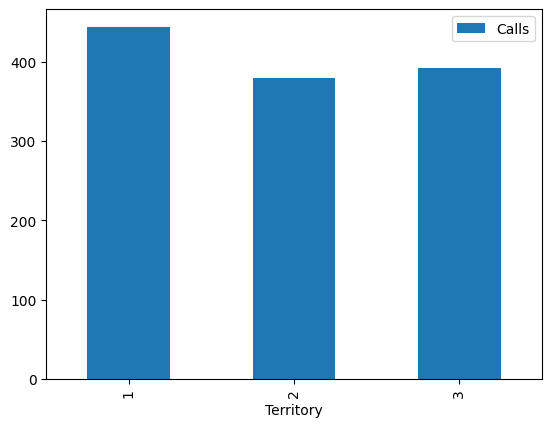

In [41]:
calls_revenue[['Territory', 'Calls']].groupby(['Territory']).sum().plot.bar()

### Try this: Plotting

Plot a line graph of the monthly average amount per call.

<Axes: xlabel='Month'>

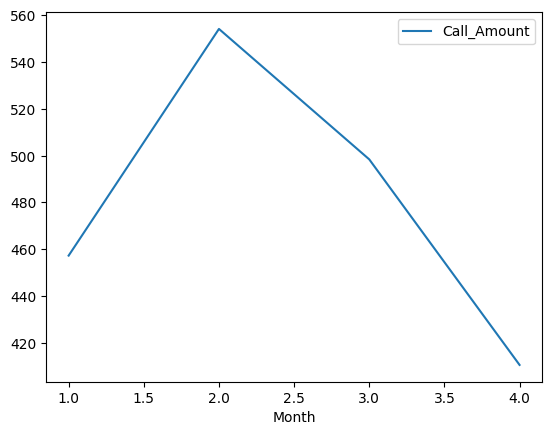

In [42]:
# @title
calls_revenue[['Month', 'Call_Amount']].groupby(['Month']).mean().plot()